In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_csv('penguins.csv')
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
#overall information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [4]:
df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [5]:
#statistical summary of the data
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


###  'flipper_length' column has a min value of (-) and that could affect the model performance,so we should take care of it

In [6]:
df['flipper_length_mm'].nunique()

57

In [7]:
df['flipper_length_mm'].unique()

array([ 181.,  186.,  195.,   nan,  193.,  190., 5000.,  180.,  182.,
        191., -132.,  185.,  197.,  184.,  194.,  174.,  189.,  187.,
        183.,  172.,  178.,  188.,  196.,  179.,  200.,  192.,  198.,
        202.,  205.,  208.,  203.,  199.,  176.,  210.,  201.,  212.,
        206.,  207.,  211.,  230.,  218.,  215.,  219.,  209.,  214.,
        216.,  213.,  217.,  221.,  222.,  220.,  225.,  224.,  231.,
        229.,  223.,  228.,  226.])

In [8]:
#we sets a condition such that it should fall within a desired range
df = df[(df['flipper_length_mm'] >171) & (df['flipper_length_mm'] < 232)]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   340 non-null    float64
 1   culmen_depth_mm    340 non-null    float64
 2   flipper_length_mm  340 non-null    float64
 3   body_mass_g        340 non-null    float64
 4   sex                333 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.9+ KB


In [10]:
df['sex'].value_counts()

MALE      167
FEMALE    165
.           1
Name: sex, dtype: int64

In [11]:
#we replace '.' with a gender since it's not a type of gender,then fill the nan values
df = df.replace('.','FEMALE')
df['sex'].fillna('MALE',inplace = True)

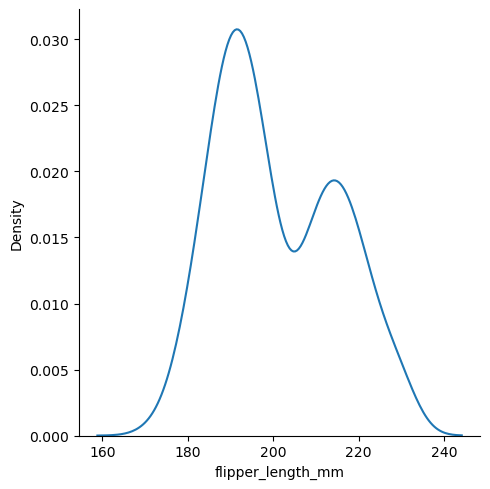

In [12]:
sns.displot(x=df['flipper_length_mm'],kind='kde')

In [13]:
df['flipper_length_mm'].min()

172.0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   340 non-null    float64
 1   culmen_depth_mm    340 non-null    float64
 2   flipper_length_mm  340 non-null    float64
 3   body_mass_g        340 non-null    float64
 4   sex                340 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.9+ KB


In [15]:
df.duplicated().sum()

0

# Now the dataset is clean,

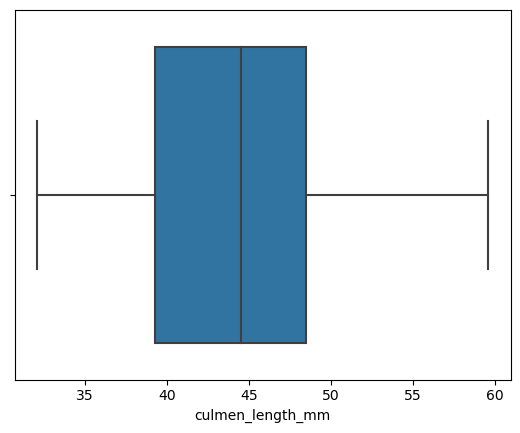

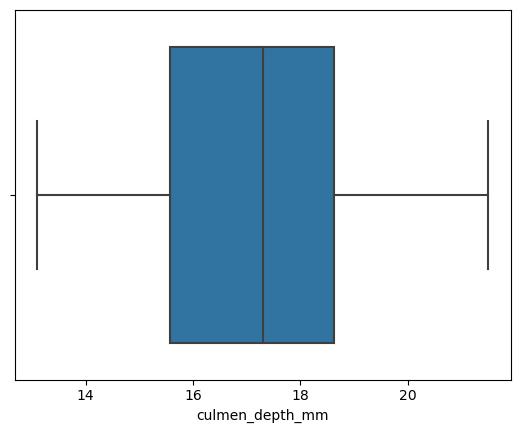

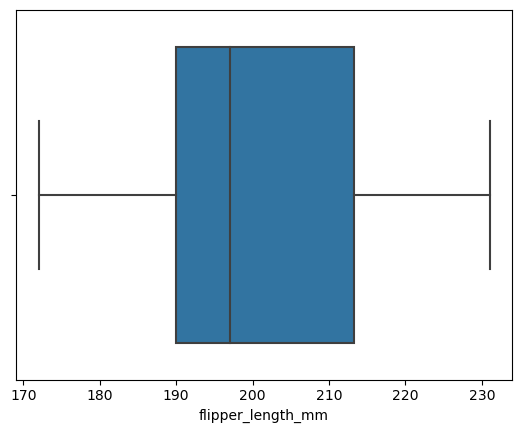

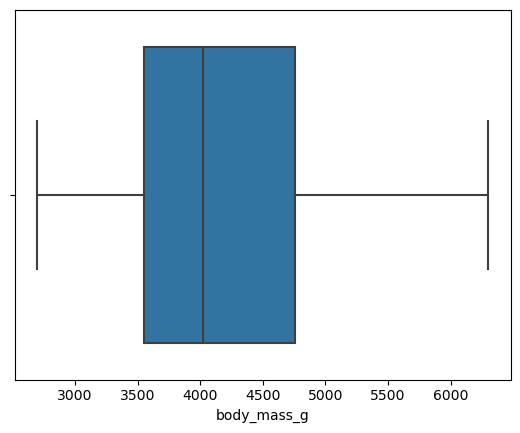

In [16]:
#let's do some boxplot to check if our data has outliers
columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']
for col in columns:
    plt.figure()
    sns.boxplot(df,x=df[col])

<Figure size 640x480 with 0 Axes>

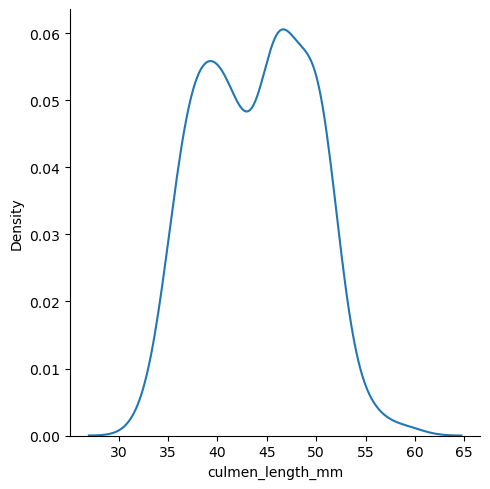

<Figure size 640x480 with 0 Axes>

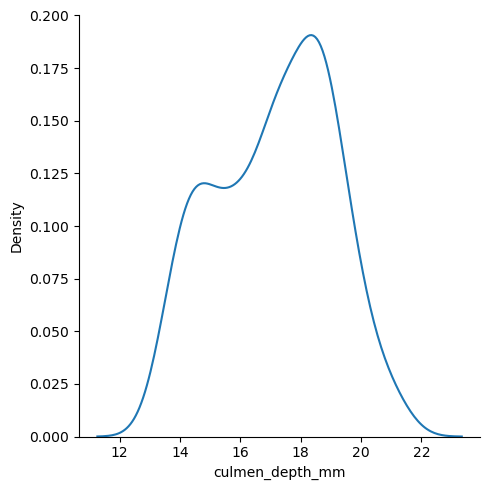

<Figure size 640x480 with 0 Axes>

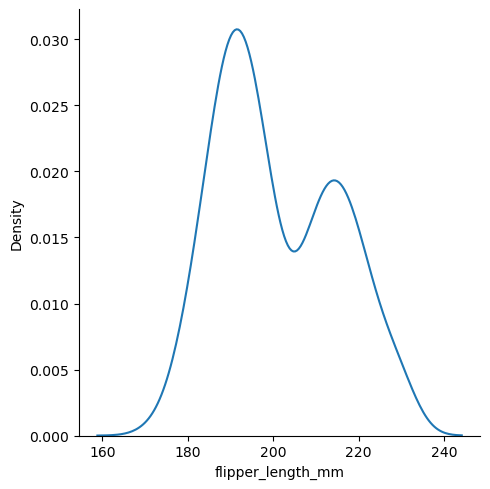

<Figure size 640x480 with 0 Axes>

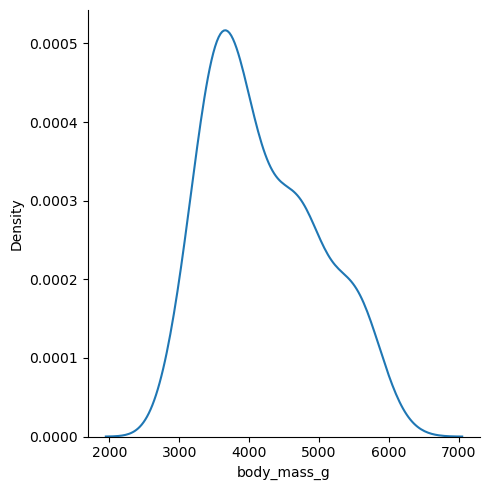

In [17]:
for col in columns:
    plt.figure()
    sns.displot(df,x=df[col],kind='kde')

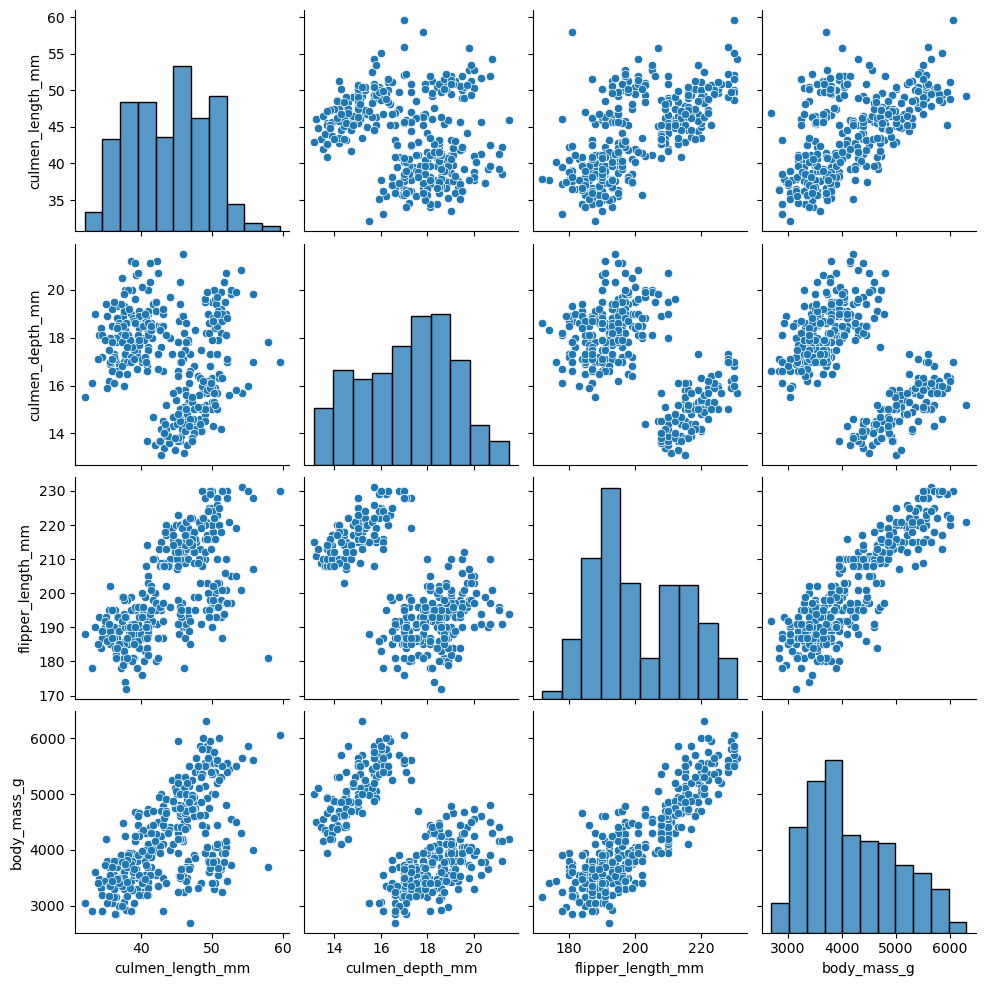

In [18]:
#from the pairplot below,we can see different clusters
sns.pairplot(df)

### From the pairplot above,we can see that we can do some bivariate clustering

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [20]:
#we're only interested in numeric columns
numeric_df = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']]
numeric_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [21]:
#let's scale the data
# we use standardscaler since most of our distributions are gaussian
scaler = StandardScaler()
numeric_df = scaler.fit_transform(numeric_df)

In [22]:
#let's convert the numpy array back to pandas dataframe
numeric_df = pd.DataFrame(numeric_df,columns=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g'])

# Bivariate Analysis

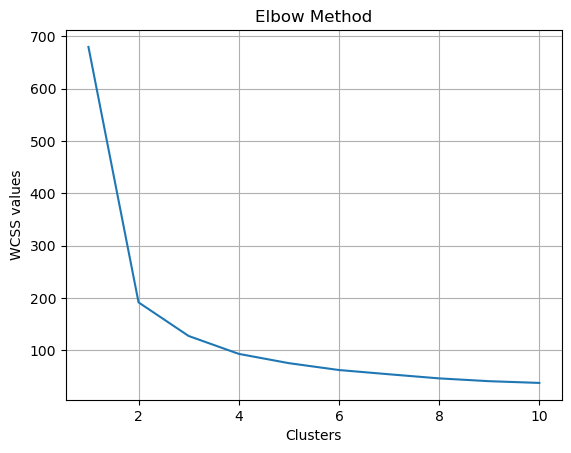

In [23]:
#here,we use the elbow technique in order to find the optimal number of clusters
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',n_init = 10,random_state = 42)
    kmeans.fit(numeric_df[['culmen_depth_mm','flipper_length_mm']])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS values')
plt.title('Elbow Method')
plt.grid()
plt.show()

### Clustering of culmen_depth_mm against flipper_length_mm

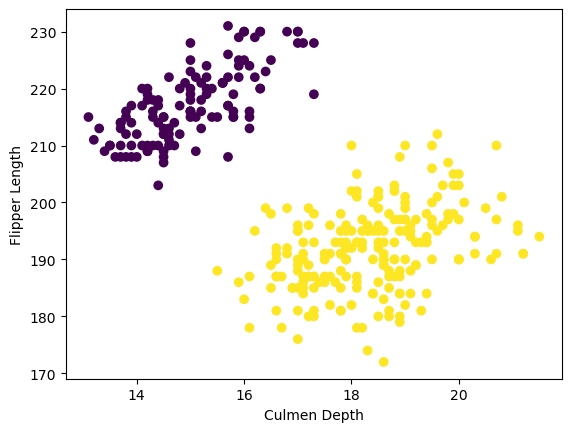

In [24]:
#we fit it to the data using 2 clusters
kmeans1 = KMeans(n_clusters = 2,n_init=10)
kmeans1.fit(numeric_df[['culmen_depth_mm','flipper_length_mm']])
plt.scatter(df['culmen_depth_mm'],df['flipper_length_mm'],c= kmeans1.labels_)
plt.xlabel('Culmen Depth')
plt.ylabel('Flipper Length')
plt.show()

In [25]:
kmeans1.inertia_

191.6923464956134

## Trivariate clustering

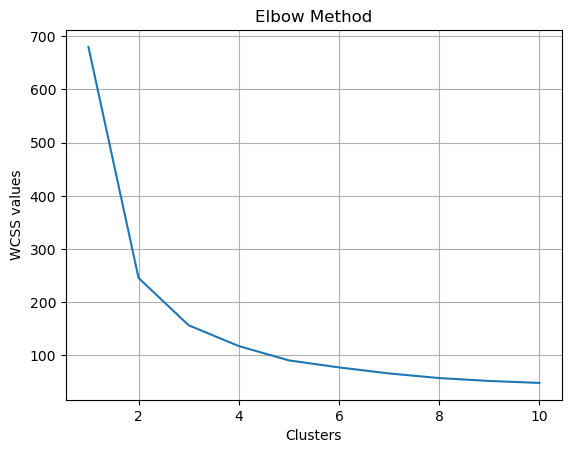

In [26]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',n_init = 10,random_state = 42)
    kmeans.fit(numeric_df[['culmen_length_mm','flipper_length_mm']])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS values')
plt.title('Elbow Method')
plt.grid()
plt.show()

### Clustering of culmen_length_mm against flipper_length_mm

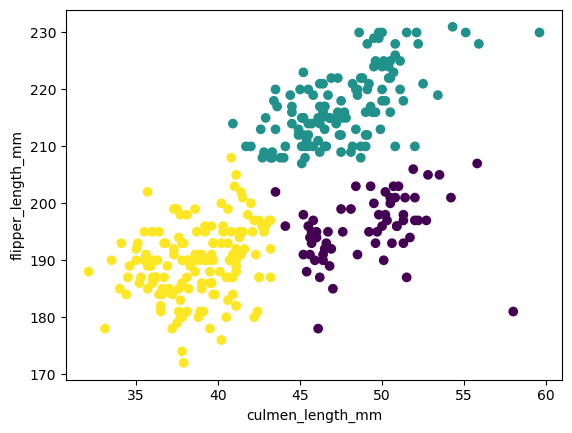

In [27]:
kmeans2 = KMeans(n_clusters = 3, n_init=10)
kmeans2.fit(numeric_df[['culmen_length_mm','flipper_length_mm']])
plt.scatter(df['culmen_length_mm'],df['flipper_length_mm'],c= kmeans2.labels_)
plt.xlabel('culmen_length_mm')
plt.ylabel('flipper_length_mm')
plt.show()

In [29]:
df['culmen_depth_mm and flipper_length_mm clusters'] = kmeans1.labels_
df['culmen_length_mm and flipper_length_mm clusters'] = kmeans2.labels_

In [30]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_depth_mm and flipper_length_mm clusters,culmen_length_mm and flipper_length_mm clusters
0,39.1,18.7,181.0,3750.0,MALE,1,2
1,39.5,17.4,186.0,3800.0,FEMALE,1,2
2,40.3,18.0,195.0,3250.0,FEMALE,1,2
4,36.7,19.3,193.0,3450.0,FEMALE,1,2
5,39.3,20.6,190.0,3650.0,MALE,1,2
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE,0,1
340,46.8,14.3,215.0,4850.0,FEMALE,0,1
341,50.4,15.7,222.0,5750.0,MALE,0,1
342,45.2,14.8,212.0,5200.0,FEMALE,0,1


# Multivariate analysis

In [31]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_depth_mm and flipper_length_mm clusters,culmen_length_mm and flipper_length_mm clusters
0,39.1,18.7,181.0,3750.0,MALE,1,2
1,39.5,17.4,186.0,3800.0,FEMALE,1,2
2,40.3,18.0,195.0,3250.0,FEMALE,1,2
4,36.7,19.3,193.0,3450.0,FEMALE,1,2
5,39.3,20.6,190.0,3650.0,MALE,1,2
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE,0,1
340,46.8,14.3,215.0,4850.0,FEMALE,0,1
341,50.4,15.7,222.0,5750.0,MALE,0,1
342,45.2,14.8,212.0,5200.0,FEMALE,0,1


In [32]:
cluster_df = df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm']]

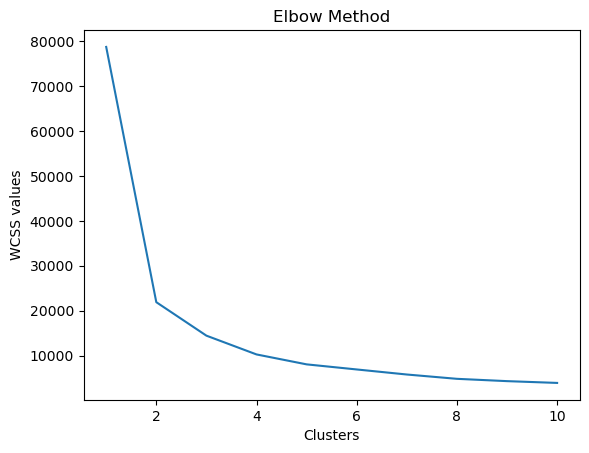

In [33]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',n_init = 10,random_state = 42)
    kmeans.fit(cluster_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS values')
plt.title('Elbow Method')
plt.show()

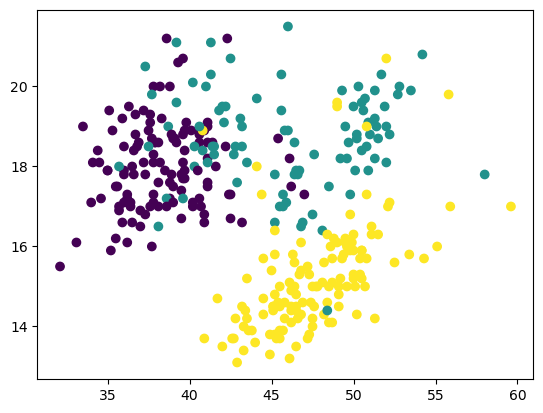

In [35]:
kmeans3 = KMeans(n_clusters = 3, n_init=10)
kmeans3.fit(cluster_df)
plt.scatter(df['culmen_length_mm'],df['culmen_depth_mm'],c= kmeans3.labels_)
plt.show()

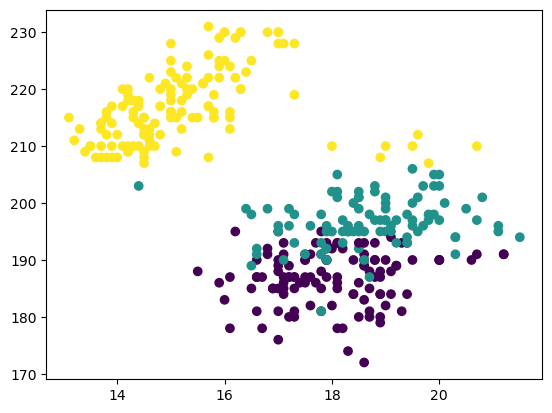

In [36]:
plt.scatter(df['culmen_depth_mm'],df['flipper_length_mm'],c= kmeans3.labels_)